# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
#Set units for code
units = "metric"

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_resp = requests.get(city_url)
        city_weather = weather_resp.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | chinchilla
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | as sulayyil
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | samana
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | mitu
Processing Record 19 of Set 1 | happy valley-goose bay
Processing Record 20 of Set 1 | cooma
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | toga village
City not found

In [28]:
city_weather = weather_resp.json()
city_weather

{'coord': {'lon': -1.1494, 'lat': 60.1545},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 5,
  'feels_like': 1.66,
  'temp_min': 5,
  'temp_max': 5,
  'pressure': 1007,
  'humidity': 78,
  'sea_level': 1007,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 4.35, 'deg': 71, 'gust': 5.08},
 'clouds': {'all': 100},
 'dt': 1702314658,
 'sys': {'type': 1,
  'id': 1438,
  'country': 'GB',
  'sunrise': 1702285068,
  'sunset': 1702306666},
 'timezone': 0,
 'id': 2644605,
 'name': 'Lerwick',
 'cod': 200}

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,15.59,71,80,3.41,CL,1702313195
1,chinchilla,-26.7500,150.6333,19.51,80,99,6.29,AU,1702313377
2,port lincoln,-34.7333,135.8667,15.93,88,42,1.51,AU,1702313128
3,talnakh,69.4865,88.3972,-24.89,97,100,4.47,RU,1702313380
4,bredasdorp,-34.5322,20.0403,20.04,55,0,4.74,ZA,1702313381


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,15.59,71,80,3.41,CL,1702313195
1,chinchilla,-26.7500,150.6333,19.51,80,99,6.29,AU,1702313377
2,port lincoln,-34.7333,135.8667,15.93,88,42,1.51,AU,1702313128
3,talnakh,69.4865,88.3972,-24.89,97,100,4.47,RU,1702313380
4,bredasdorp,-34.5322,20.0403,20.04,55,0,4.74,ZA,1702313381


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

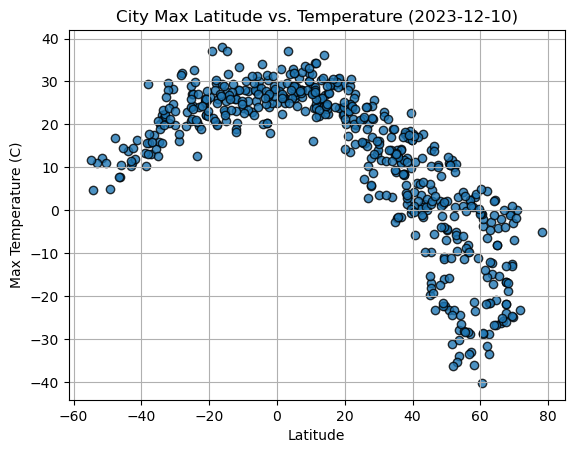

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha= .8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-12-10)")
plt.grid()

# Save the figure
plt.savefig("Figures/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

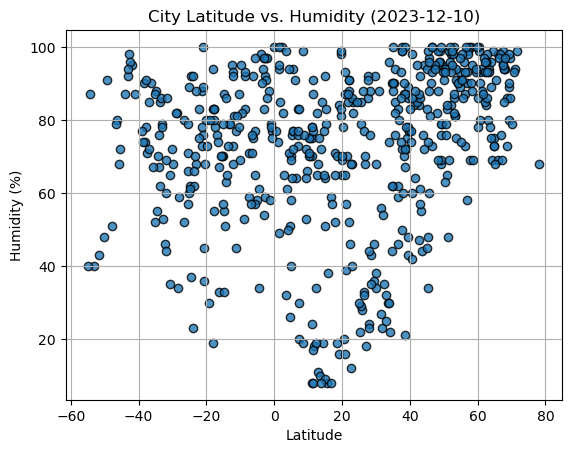

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha= .8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-12-10)")
plt.grid()

# Save the figure
plt.savefig("Figures/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

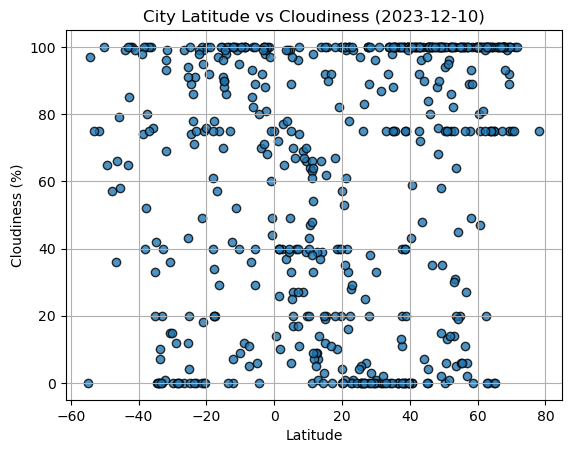

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha= .8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-12-10)")
plt.grid()

# Save the figure
plt.savefig("Figures/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

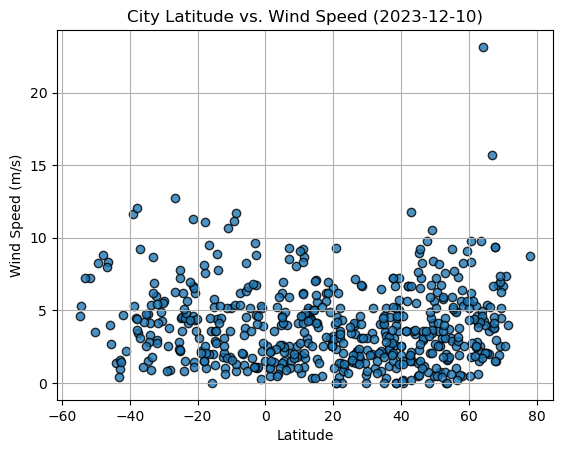

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha= .8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-12-10)")
plt.grid()
# Save the figure
plt.savefig("Figures/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


### Define a function to create Linear Regression plots

`(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)`

`regress_values = x_values * slope + intercept`

`line_eq = "y" = str(round(slope,2)) + "x + " + str(round(intercept, 2))` 

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,talnakh,69.4865,88.3972,-24.89,97,100,4.47,RU,1702313380
6,whitehorse,60.7161,-135.0538,-3.57,80,75,9.77,CA,1702313269
7,bilibino,68.0546,166.4372,-18.89,94,100,1.48,RU,1702313385
9,kapuskasing,49.4169,-82.4331,-10.95,79,100,4.12,CA,1702313388
10,as sulayyil,20.4607,45.5779,20.14,20,53,4.05,SA,1702313389


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,15.59,71,80,3.41,CL,1702313195
1,chinchilla,-26.7500,150.6333,19.51,80,99,6.29,AU,1702313377
2,port lincoln,-34.7333,135.8667,15.93,88,42,1.51,AU,1702313128
4,bredasdorp,-34.5322,20.0403,20.04,55,0,4.74,ZA,1702313381
5,invercargill,-46.4000,168.3500,7.85,80,66,8.32,NZ,1702313382


###  Temperature vs. Latitude Linear Regression Plot

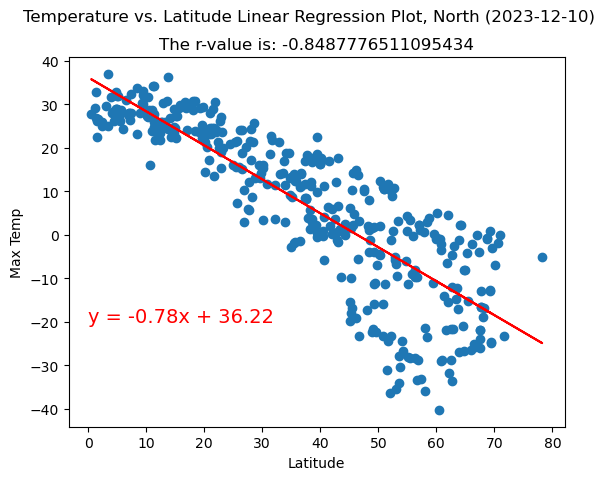

In [45]:
# Linear regression on Northern Hemisphere, Temperature vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (0,-20), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.suptitle("Temperature vs. Latitude Linear Regression Plot, North (2023-12-10)")
plt.title(f"The r-value is: {rvalue}")
plt.savefig("Figures/t_v_l_north_linear_regress")


plt.show()


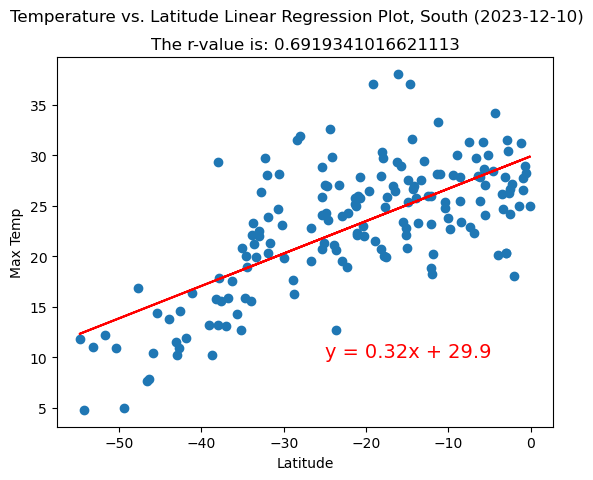

In [47]:
# Linear regression on Southern Hemisphere, Temperature vs Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-25,10), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title((f"The r-value is: {rvalue}"))
plt.suptitle("Temperature vs. Latitude Linear Regression Plot, South (2023-12-10)")
plt.savefig("Figures/t_v_l_south_linear_regress")

plt.show()

# **Discussion about the linear relationship:**


The linear regression plot shows a *negative relationship* between temperature and latitude in the *Northern Hemisphere*. 

Therefore, the ***temperature decreases*** when the ***distance from the equator increases***.

If we round the r-value using `plt.title(f"The r-value is: {round(rvalue)}")` we obtain -1. 


> Without rounding, the r-value is -0.8487776511095434


On the contrary, in the *Southern Hemisphere*, the linear regression displays a *positive relationship* between temperature and latitude:


> 0.6919341016621113 or 1 if rounded. 

Thus, as the ***proximity to the equator increases***, so does the ***temperature***.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43699269779594163


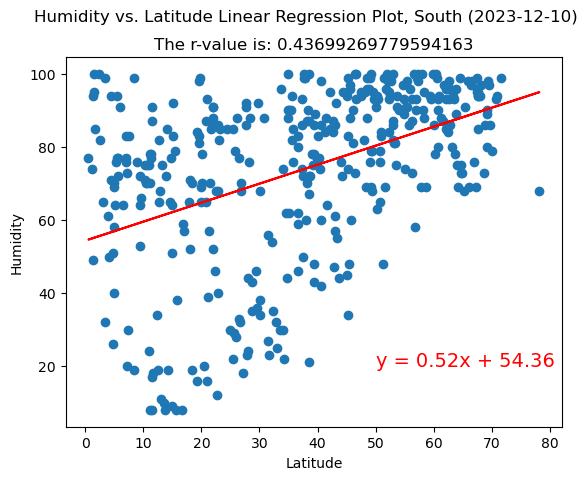

In [53]:
# Northern Hemisphere, Humidity vs Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (50,20), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title((f"The r-value is: {rvalue}"))
plt.suptitle("Humidity vs. Latitude Linear Regression Plot, South (2023-12-10)")
plt.savefig("Figures/h_v_l_north_linear_regress")
print(f"The r-value is: {rvalue}")

plt.show()

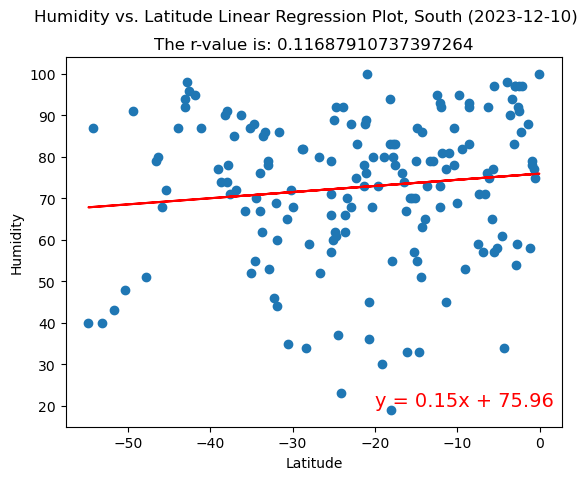

In [54]:
# Southern Hemisphere, Humidity vs Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-20,20), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"The r-value is: {rvalue}")
plt.suptitle("Humidity vs. Latitude Linear Regression Plot, South (2023-12-10)")
plt.savefig("Figures/h_v_l_south_linear_regress")

plt.show()

**Discussion about the linear relationship:**

The linear regression plot ***doesn't show a significant relationship*** between humidity and latitude in the *Northern Hemisphere*. 

Humidity increases slightly as the distance from the equator increases.


If we round the r-value, we obtain 0. 

> Without rounding, the r-value is 0.43699269779594163

The correlation between humidity and latitude is ***even more insignificant*** in the *Southern Hemisphere*: 

> the r-value is 0.11687910737397264 or 0 if rounded. 

### Cloudiness vs. Latitude Linear Regression Plot

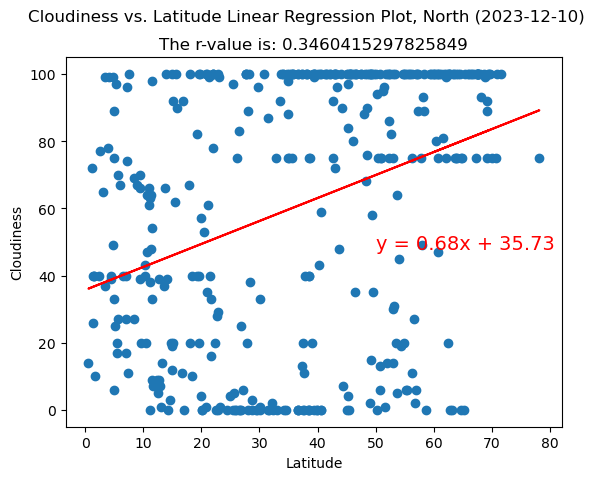

In [57]:
# Northern Hemisphere, Cloudiness vs Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (50,48), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"The r-value is: {rvalue}")
plt.suptitle("Cloudiness vs. Latitude Linear Regression Plot, North (2023-12-10)")
plt.savefig("Figures/c_v_l_north_linear_regress")

plt.show()

The r-value is: 0.14493843505789666


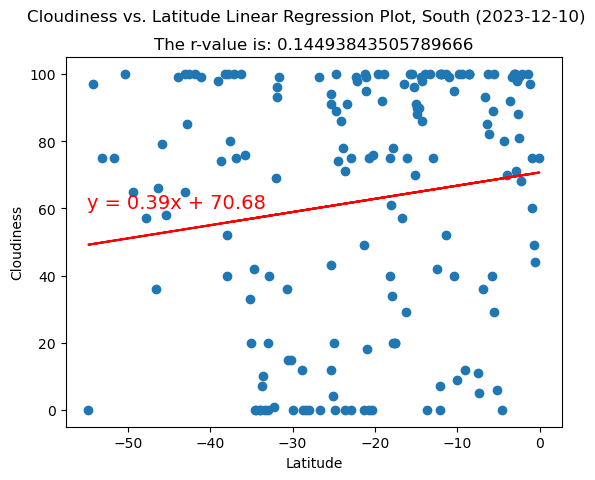

In [59]:
# Southern Hemisphere, Cloudiness vs Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-55,60), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"The r-value is: {rvalue}")
plt.suptitle("Cloudiness vs. Latitude Linear Regression Plot, South (2023-12-10)")
plt.savefig("Figures/c_v_l_south_linear_regress")
print(f"The r-value is: {(rvalue)}")

plt.show()

**Discussion about the linear relationship:**

Cloudiness grows slightly as the distance from the equator increases in the *Northern Hemisphere*.

If we round the r-value, we obtain 0. 

> Without rounding, the r-value is The r-value is: 0.3460415297825849

Similarly, the correlation between cloudiness and latitude is small in the *Southern Hemisphere*: 

> The r-value is 0.14493843505789666 or 0 if rounded. 

Cloudiness barely increases closer to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

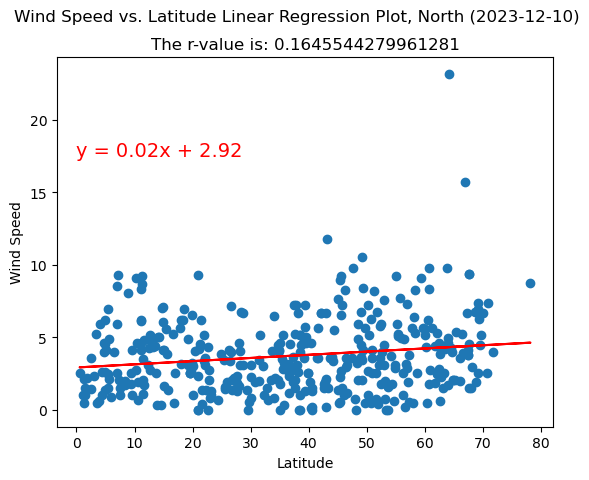

In [62]:
# Northern Hemisphere, wind speed vs latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (0,17.5), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"The r-value is: {rvalue}")
plt.suptitle("Wind Speed vs. Latitude Linear Regression Plot, North (2023-12-10)")
plt.savefig("Figures/w_v_l_north_linear_regress")

plt.show()

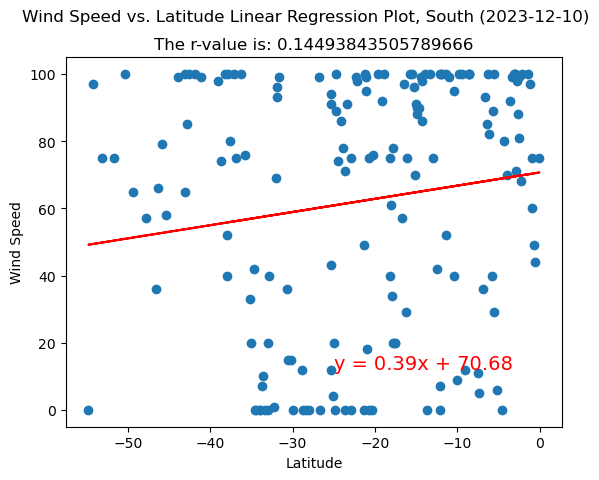

In [65]:
# Southern Hemisphere, wind speed vs latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue,stderr)= linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-25,12), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"The r-value is: {rvalue}")
plt.suptitle("Wind Speed vs. Latitude Linear Regression Plot, South (2023-12-10)")
plt.savefig("Figures/w_v_l_north_linear_regress")

plt.show()

**Discussion about the linear relationship:**


The linear regression plot *does not* portray a noteworthy relationship between wind speed and latitude in the *Northern Hemisphere*.

> If we round the r-value, we obtain 0. Without rounding,  0.1645544279961281

However, the wind speed remains low (less than 10 m/h, with just four outliers today) despite the distance from the equator.


In the *Southern Hemisphere*, the correlation between wind speed and latitude is small as well: 

> The r-value is 0.14493843505789666 or 0 if rounded. 

Unlike in the Northern Hemisphere, the wind speed range is wide in the South (as high as 100 m/h and as low as 0 m/h).